# Learning 

Reading: Chapter 5 

Acknowledgement: some material from the Python Data Science Handbook by Jake VanderPlas

There are three broad classes of machine learning tasks:
1. Supervised Learning: training set with desired outputs available
2. Unsupervised Learning: no labels available; algorithm has to find structure on its own.
3. Reinforcement Learning: learn from experiences, getting positive and negative rewards; choose actions to maximize rewards.



In [1]:
import pandas as pd
import numpy as np
import matplotlib 
import seaborn as sns
%matplotlib inline

import sklearn

In [2]:
np.random.seed(5550)    # Set seed for reproducibility of notebook

## Supervised Learning 

This module focuses on a particular class of supervised machine learning: classification, where we have a finite number of choices to label an observation. 

Goals for this module:
* Exposure to the [Scikit-learn toolbox](https://scikit-learn.org/stable/index.html)
* Metrics to evaluate performance of ML algorithm
* Training / Validation / Testing
* Awareness of some ML algorithms and their mathematical foundations

## Problem Statement 

We are given $n$ samples of data which belong to two (or more) classes.   We want to utilize an algorithm to learn from these already labeled data in order to predict the class of unlabeled data.  Each data has at least one feature (a.k.a. attribute).  We sometimes refer to this data as *multi-variate* data.  The terminology used in the ML domain varies greatly.  
* features / attributes / dimensions / regressors / covariates / predictors / independent variables are used interchangably.
* samples / instances / examples 
* classes / label / outcome / response / dependent variable

We will make use of `scikit-learn`, https://en.wikipedia.org/wiki/Scikit-learn, which has various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means clustering.

`scikit-learn` Documentation: https://scikit-learn.org/stable/index.html

# `scikit-learn` 

There are several Python libraries which provide implementations of a range of machine learning algorithms.
One of the best known is [Scikit-Learn](http://scikit-learn.org), a package that provides efficient versions of a large number of common algorithms.
Scikit-Learn is characterized by a clean, uniform, and streamlined API, as well as by very useful and complete online documentation.
A benefit of this uniformity is that once you understand the basic use and syntax of Scikit-Learn for one type of model, switching to a new model or algorithm is very straightforward.


We will start by covering *data representation* in Scikit-Learn, followed by covering the *Estimator* API, and finally go example of these methods. 

## Data Representation in Scikit-Learn

Machine learning is about creating models from data: for that reason, we'll start by discussing how data can be represented in order to be understood by the computer.
The best way to think about data within Scikit-Learn is in terms of tables, or matrices, of data.

### Data as table

A basic table is a two-dimensional grid of data, in which the rows represent individual elements of the dataset, and the columns represent quantities related to each of these elements.
For example, consider the [Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set), famously analyzed by Ronald Fisher in 1936.
We can download this dataset in the form of a Pandas ``DataFrame`` using the [seaborn](http://seaborn.pydata.org/) library:

In [3]:
# import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Here each row of the data refers to a single observed flower, and the number of rows is the total number of flowers in the dataset.
In general, we will refer to the rows of the matrix as *samples*, and the number of rows as ``n_samples``.

Likewise, each column of the data refers to a particular quantitative piece of information that describes each sample.
In general, we will refer to the columns of the matrix as *features*, and the number of columns as ``n_features``.

#### Features matrix

This table layout makes clear that the information can be thought of as a two-dimensional numerical array or matrix, which we will call the *features matrix*.
By convention, this features matrix is often stored in a variable named ``X``.
The features matrix is assumed to be two-dimensional, with shape ``[n_samples, n_features]``, and is most often contained in a NumPy array or a Pandas ``DataFrame``, though some Scikit-Learn models also accept SciPy sparse matrices.

The samples (i.e., rows) always refer to the individual objects described by the dataset.
For example, the sample might be a flower, a person, a document, an image, a sound file, a video, an astronomical object, or anything else you can describe with a set of quantitative measurements.

The features (i.e., columns) always refer to the distinct observations that describe each sample in a quantitative manner.
Features are generally real-valued, but may be Boolean or discrete-valued in some cases.

#### Target array

In addition to the feature matrix ``X``, we also generally work with a *label* or *target* array, which by convention we will usually call ``y``.
The target array is usually one dimensional, with length ``n_samples``, and is generally contained in a NumPy array or Pandas ``Series``.
The target array may have continuous numerical values, or discrete classes/labels.
While some Scikit-Learn estimators do handle multiple target values in the form of a two-dimensional, ``[n_samples, n_targets]`` target array, we will primarily be working with the common case of a one-dimensional target array.

Often one point of confusion is how the target array differs from the other features columns. The distinguishing feature of the target array is that it is usually the quantity we want to *predict from the data*: in statistical terms, it is the dependent variable.
For example, in the preceding data we may wish to construct a model that can predict the species of flower based on the other measurements; in this case, the ``species`` column would be considered the target array.

With this target array in mind, we can use Seaborn to conveniently visualize the data:

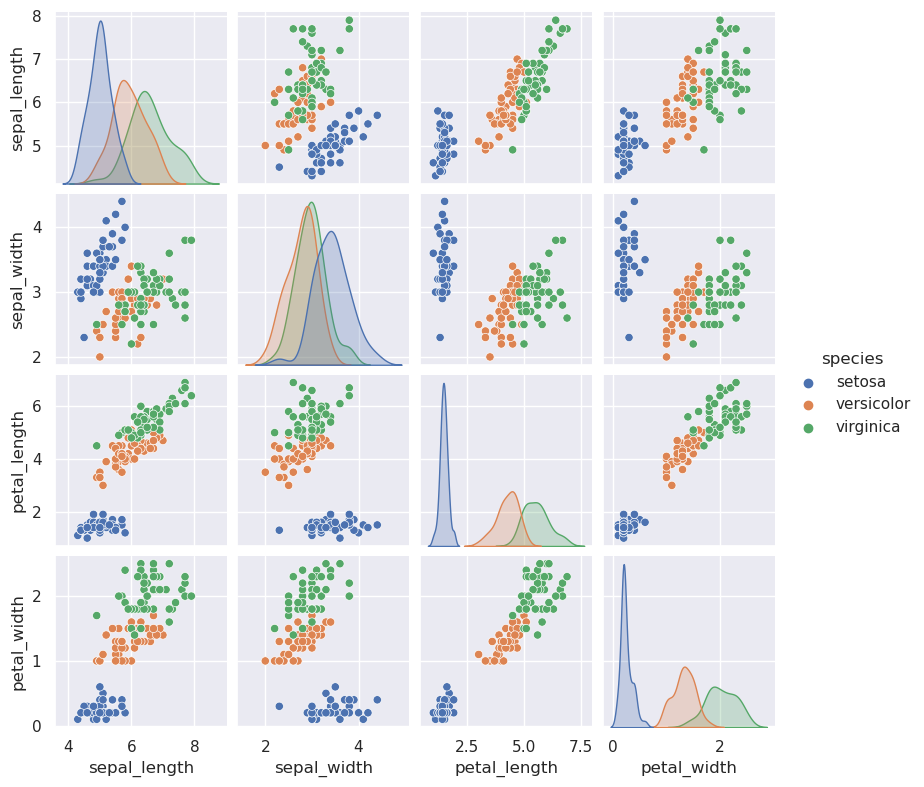

In [4]:
sns.set()
sns.pairplot(iris, hue='species', height=2);

For use in Scikit-Learn, we will extract the features matrix and target array from the ``DataFrame``, which we can do using some of the Pandas ``DataFrame`` operations:

In [5]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [6]:
y_iris = iris['species']
y_iris.shape

(150,)

### Data as `numpy` array 

The iris data set is also available directly in scikit-learn.

In [7]:
import matplotlib.pylab as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets # import standard datasets

iris = datasets.load_iris() # load iris data set

The sample datasets are dictionary objects that hold the data and some related metadata.

In [8]:
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [9]:
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

The actual feature array is stored in `.data` 

In [10]:
type(iris.data)

numpy.ndarray

### Aside: NumPy Array 

We can look at various properties and ways to index into a `numpy` array. 

In [11]:
print("x3 ndim: ", iris.data.ndim)
print("x3 shape:", iris.data.shape)
print("x3 size: ", iris.data.size)

x3 ndim:  2
x3 shape: (150, 4)
x3 size:  600


In a single dimensional array, you can use indexing like Python's standard list indexing. 

In [12]:
x1 = np.random.randint(10, size=6)  # One-dimensional array

In [13]:
x1

array([6, 7, 9, 9, 9, 4])

In [14]:
x1[0]

6

In [15]:
x1[4]

9

In [16]:
x1[-1]

4

For a multi-dimensional array, items can be accessed using a comma-separated tuple of indices.

In [17]:
x2 = np.random.randint(10, size=(3, 5))  # Two-dimensional array
x2

array([[4, 8, 5, 1, 1],
       [2, 7, 0, 5, 8],
       [1, 6, 2, 5, 9]])

In [18]:
x2[0, 0]

4

In [19]:
x2[2,-1]

9

We can access subarrays using the slide notation with the `:`.  Slice syntax follows that of standard Python list `x[start:stop:step]`.  

If any of these are unspecified, the default values of `start=0`, `stop=size of dim` and `step=1` are used.  

In [20]:
x1[:5]  # first five elements

array([6, 7, 9, 9, 9])

In [21]:
x1[4:7]  # middle sub-array

array([9, 4])

In [22]:
x1[1::2] # every other element, starting at index 1

array([7, 9, 4])

In [23]:
x2[:2, :3]  # two rows, three columns

array([[4, 8, 5],
       [2, 7, 0]])

In [24]:
x2[:3, ::2]  # all rows, every other column

array([[4, 5, 1],
       [2, 0, 8],
       [1, 2, 9]])

We can also access elements based on conditions using Boolean arrays as masks

In [25]:
x2

array([[4, 8, 5, 1, 1],
       [2, 7, 0, 5, 8],
       [1, 6, 2, 5, 9]])

In [26]:
x2[x2 < 5]

array([4, 1, 1, 2, 0, 1, 2])

Fancy indexing is conceptually simple: it means passing an array of indices to access multiple array elements at once.

For even more powerful operations, fancy indexing can be combined with the other indexing schemes we've seen.

In [27]:
x2[1:, [1, 0]]

array([[7, 2],
       [6, 1]])

### Back to Supervised Learning

Here we can look at the first five rows of the iris data `X`. 

In [28]:
print(iris.data[:5,:])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [29]:
features = iris.data.shape[1]
samples = iris.data.shape[0]
print("number of samples = %g, number of features = %g" % (samples, features))

number of samples = 150, number of features = 4


In [30]:
print("number of samples in target array %g" % (iris.target.shape[0]))

number of samples in target array 150


## Scikit-learn's Estimator API 

The Scikit-Learn API is designed with the following guiding principles in mind, as outlined in the [Scikit-Learn API paper](http://arxiv.org/abs/1309.0238):

- *Consistency*: All objects share a common interface drawn from a limited set of methods, with consistent documentation.

- *Inspection*: All specified parameter values are exposed as public attributes.

- *Limited object hierarchy*: Only algorithms are represented by Python classes; datasets are represented
  in standard formats (NumPy arrays, Pandas ``DataFrame``s, SciPy sparse matrices) and parameter
  names use standard Python strings.

- *Composition*: Many machine learning tasks can be expressed as sequences of more fundamental algorithms,
  and Scikit-Learn makes use of this wherever possible.

- *Sensible defaults*: When models require user-specified parameters, the library defines an appropriate default value.

In practice, these principles make Scikit-Learn very easy to use, once the basic principles are understood.
Every machine learning algorithm in Scikit-Learn is implemented via the Estimator API, which provides a consistent interface for a wide range of machine learning applications.

### Basics of the API 

Most commonly, the steps in using the Scikit-Learn estimator API are as follows
(we will step through a handful of detailed examples in the sections that follow).

1. Choose a class of model by importing the appropriate estimator class from Scikit-Learn.
2. Choose model hyperparameters by instantiating this class with desired values.
3. Arrange data into a features matrix and target vector following the discussion above.
4. Fit the model to your data by calling the ``fit()`` method of the model instance.
5. Apply the Model to new data:
   - For supervised learning, often we predict labels for unknown data using the ``predict()`` method.
   - For unsupervised learning, we often transform or infer properties of the data using the ``transform()`` or ``predict()`` method.

We will now step through a simple examples of applying supervised learning methods.

###  Supervised learning example: KNN

All ML objects in `scikit-learn` share a uniform API for learning (or training a model, and predicting, namely, `fit()` and `predict()`.  




**KNN**

We begin with the $k$ nearest neighbors (KNN) algorithm, which is a widely used technique because it can be evaluated very quickly, and it is easy to interpret the output. How does the KNN algorithm work?  For each test sample:
1. Pick a value of $k$: the number of neighbors we wish to use for classification.
2. Compute some measure between the test sample and each training sample.  Often, one uses the Euclidean distance, but other metrics might be appropriate.
3. Sort the computed distances in increasing order based on distance values
4. For the $k$ closest training samples, return the most frequent class as the predicted class.

#### 1. Choose a class of model 

In Scikit-Learn, every class of model is represented by a Python class. So, for example, if we would like to compute a Knearest neighbors model, we can import the [KNeighbors classification](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier) class:

In [31]:
from sklearn import neighbors

Note, there are other neighbors models (for regression, unsupervised learning, etc.).  You can read more about them in the [`sklearn.neighbors` module documentation](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.neighbors)

#### 2. Choose model hyperparameters 

An important point is that *a class of model is not the same as an instance of a model*.

Once we have decided on our model class, there are still some options open to us.
Depending on the model class we are working with, we might need to answer one or more questions like the following:

* How many neighbors will be considered when making the classification? 
* How are the neighbors weighted? 
* Which method to carry out the model should be used? 
* and more 

These are examples of the important choices that must be made *once the model class is selected*.
These choices are often represented as *hyperparameters*, or parameters that must be set before the model is fit to data.
In Scikit-Learn, hyperparameters are chosen by passing values at model instantiation.
We will explore how you can quantitatively motivate the choice of hyperparameters later. 

For our example, we will set the number of neighbors to 5 and use the default options for other parameters. 


In [32]:
model = neighbors.KNeighborsClassifier(n_neighbors = 5)

Keep in mind that when the model is instantiated, the only action is the storing of these hyperparameter values.
In particular, we have not yet applied the model to any data: the Scikit-Learn API makes very clear the distinction between *choice of model* and *application of model to data*.

#### 3. Arrange data into a features matrix and target vector 

Previously we detailed the Scikit-Learn data representation, which requires a two-dimensional features matrix and a one-dimensional target array.

For our example, the data is already in the correct form. 

In [33]:
# train the classifier using the all the samples, except the last one
X = iris.data[:-1]
y = iris.target[:-1]

#### 4. Fit the model to the data 

Now it is time to apply our model to data.
This can be done with the ``fit()`` method of the model:

In [34]:
model.fit(X, y)

KNeighborsClassifier()

This `fit()` command causes a number of model-dependent internal computations to take place, and the results of these computations are stored in model-specific attributes that the user can explore. In Scikit-Learn, by convention all model parameters that were learned during the `fit()` process have trailing underscores; for example

In [35]:
model.n_samples_fit_

149

One question that frequently comes up regards the uncertainty in such internal model parameters.
In general, Scikit-Learn does not provide tools to draw conclusions from internal model parameters themselves: interpreting model parameters is much more a *statistical modeling* question than a *machine learning* question.
Machine learning rather focuses on what the model *predicts*.
If you would like to dive into the meaning of fit parameters within the model, other tools are available, including the [Statsmodels Python package](http://statsmodels.sourceforge.net/).

#### 5. Predict labels for unknown data 

Once the model is trained, the main task of supervised machine learning is to evaluate it based on what it says about new data that was not part of the training set.
In Scikit-Learn, this can be done using the ``predict()`` method.
For the sake of this example, our "new data" will be a grid of *x* values, and we will ask what *y* values the model predicts:

In [36]:
y_pred = model.predict(iris.data[-1:])
y_pred

array([2])

In [37]:
iris.target[-1]

2

The model predicted the target correctly. 

### Supervised Learning Example - All together 

Let's put the code above into a single cell to choose a model, set the hyperparameters, arrange the data, fit the model, and predict labels.

In [38]:
from sklearn import neighbors
# create an instance of K-nearest neighbor classifer
# sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, *, weights='uniform', 
#                                        algorithm='auto', leaf_size=30, p=2, 
#                                        metric='minkowski', metric_params=None, 
#                                        n_jobs=None, **kwargs)
knn = neighbors.KNeighborsClassifier(n_neighbors = 5)

# train the classifier using the all the samples, except the last one
# fit(X, y)   Fit the model using X as training data and y as target values
knn.fit(iris.data[:-1], iris.target[:-1] )

# compute the prediction of the last sample according to the model
# predict(X)  Predict the class labels for the provided data.
predict  = knn.predict(iris.data[-1:])

print("actual classification: " + iris.target_names[iris.target[-1]])
print("predicted classification: " + iris.target_names[predict[0]])

actual classification: virginica
predicted classification: virginica


### Visualize Classification boundary 

It is difficult to visualize the classification boundary for four-dimensional data (sepal length, sepal width, petal length, petal width). We could take a slice of the four-dimensional space to visualize the classification along two dimensions. Instead, suppose we only fit the training samples using the first two features, sepal length and sepal width (in cm). We can visualize the classification boundary for this classification by laying down a mesh, and running a predictor at the mesh values.


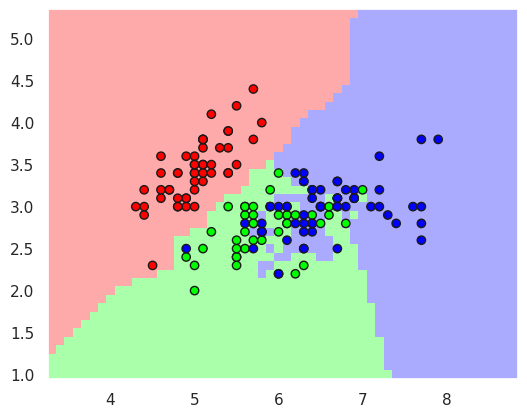

In [39]:
x = iris.data[:,:2] # take only the first two columns
y = iris.target

# train classifier
knn = neighbors.KNeighborsClassifier(n_neighbors = 3)
knn.fit(x, y)

# setup mesh
h = 0.1
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xg, yg = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# run classifier on mesh
z = knn.predict(np.c_[xg.ravel(), yg.ravel()])

# specifying some colors
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# plot classifier
zg = z.reshape(xg.shape)
_ = plt.figure()
_ = plt.pcolormesh(xg,yg,zg,cmap=cmap_light)

# overlay with training data points
_ = plt.scatter(x[:,0],x[:,1],c=y, cmap=cmap_bold, edgecolor='k')

# setting the aspect ratio so we can visualize distance properly
_ = plt.gca().set_aspect('equal')

## Performance Measures 


One of the most basic way to measure performance of a classifier is its accuracy, $$ acc = \frac{\text{Number of correct predictions}}{n}.$$  Lets return to the full iris data set, train the model on all the data, and run the predictor on the data.

In [40]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 11)

# train the classifier using the all the samples
knn.fit(iris.data, iris.target)

# compute the prediction each sample using the model
predict  = knn.predict(iris.data)

from sklearn.metrics import accuracy_score

# compute the accuracy of the predictions: 
# sklearn.metrics.accuracy_score(y_true, y_pred, ...)
accuracy_score(iris.target, predict)

0.9733333333333334

### Confusion Matrix

This is a surprisingly good model.  However, keep in mind that we have fit the model to the data, so we won't know how it will perform on unseen data.  We'll address this later.  First, one might need a more detailed analysis for the prediction of elements within classifications.  If we were doing a binary classification (e.g. true / false), we would normally present a [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix), that compares the predictor to the ground truth
<table border=1px>
    <tr>
        <th></th>
        <th colspan=2 text-align="center">Ground Truth </th>
    </tr>
    <tr>
        <th>Prediction </th>
        <th>Positive</th>
        <th>Negative</th>
    </tr>
    <tr>
        <th> Positive </th>
        <td> TP </td>
        <td> FP </td>
    </tr>
    <tr>
        <th> Negative </th>
        <td> FN </td>
        <td> TN </td>
    </tr>
</table>
where 

* TP: true positives: classifier predicts a sample as positive in accordance with ground truth
* FP: false positive: classifier predicts a sample as positive in conflict with ground truth
* TN: true negative:  classifier predicts a sample as negative in accordance with ground truth
* FN: false negative: classifier predicts a sample as negative in conflict with ground truth

Note the similarity with the type-I and type-II error we saw previously in hypothesis testing. Using this notation, the accuracy is $$ \text{accuracy} = \frac{\text{TP + TN}}{\text{TP + TN + FP + FN}}.$$ There are a few additional metrics of interest:

* sensitivity, recall, true positive rate: 
$$ \text{sensitivity} = \frac{\text{TP}}{\text{TP + FN}}$$
* specificity, true negative rate: $$ \text{specificity} = \frac{\text{TN}}{\text{TN + FP} }$$
* precision, positive predictive value: $$ \text{precision} = \frac{\text{TP}}{\text{TP + FP} }$$
* negative predictive value: $$ \text{NPV} = \frac{\text{TN}}{\text{TN + FN} }$$


__Question__: What do we do when there are more classes? well, we can generate a $k \times k$ matrix, where $k$ is the number of classes.  Four our iris example:
<table border=1px>
    <tr>
        <th></th>
        <th colspan=3 text-align="center">Ground Truth </th>
    </tr>
    <tr>
        <th>Prediction </th>
        <th>setosa</th>
        <th>versicolor</th>
        <th>virginica</th>       
    </tr>
    <tr>
        <th> setosa </th>
        <td> TC </td>
        <td> FC </td>
        <td> FC </td>
    </tr>
    <tr>
        <th> versicolor </th>
        <td> FC </td>
        <td> TC </td>
        <td> FC </td>
    </tr>
    <tr>
        <th> virginica </th>
        <td> FC </td>
        <td> FC </td>
        <td> TC </td>
    </tr>
</table>
where we now have

* TC: true classification
* FC: false classification, where you could even specify further by extending the idea of false negative or false positive, for example, falsely identified setosa as versicolor.

Lets generate the confusion matrix for our classification problem

In [41]:
C = np.empty([3,3])
for i in range(3):
    for j in range(3):
        C[i,j] = np.sum(np.logical_and(iris.target==i, predict==j))
print(C)

[[50.  0.  0.]
 [ 0. 48.  2.]
 [ 0.  2. 48.]]


We can also use `scikit-learn` [`confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix) method. 

In [42]:
# sklearn.metrics.confusion_matrix(y_true, y_pred, ...)
from sklearn.metrics import confusion_matrix 

confusion_matrix(iris.target, predict)


array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  2, 48]])

Here, our classifier identifies all the setosa variety perfectly; it identified 48/50 versicolor correctly, and misclassified 2 versicolors as verginica; the classifier identified 48/50 virginica variety correctly, and misclassified 2 virginica varieties as versicolor. 

In order to extend the performance metrics from the binary classification (i.e. sensitivity, specificity, precision or NPV), a pair-wise comparison is needed, i.e., setosa -- non-setosa, versicolor -- non-versicolor, virginica -- non-verginica.

Although the performance measures look pretty good, we have thus far checked the classifier performance on the same data that it has been trained on.  This is a common *fundamental flaw* in evaluating machine learning models.


We have no way to measure how the model will behave on new, unlabeled data.  The common approach is to split the data into a **training** set and a **test** set. 

### Model validation with Train/Test sets 

So what can be done?
A better sense of a model's performance can be found using what's known as a *test or holdout set*: that is, we hold back some subset of the data from the training of the model, and then use this test/holdout set to check the model performance.

<img src="https://pages.mtu.edu/~lebrown/un5550-f21/p6/train_test_split_new.png" width="50%">


This splitting can be done using the ``train_test_split`` utility in Scikit-Learn:

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, 
                                                    test_size=0.33, random_state=10)
# note: test_size is a number between 0 and 1,
# random_state is the seed used by the random number generator.  
# Here, I've fixed it to 10 for reproducibility

knn = neighbors.KNeighborsClassifier(n_neighbors = 5)

# train the classifier using the training data
knn.fit(X_train, y_train)

# compute the prediction of the test set using the model
predict  = knn.predict(X_test)

from sklearn.metrics import accuracy_score
print("accuracy = %g " % (accuracy_score(y_test, predict)))

accuracy = 0.96 


We see here a more reasonable result: the nearest-neighbor classifier is about 95% accurate on this hold-out set. The hold-out set is similar to unknown data, because the model has not "seen" it before.

Calculating the confusion matrix on the test data. 


In [44]:
confusion_matrix(y_test, predict)

array([[15,  0,  0],
       [ 0, 17,  2],
       [ 0,  0, 16]])

Which allows us to conclude that the classifier had a bit of problem trying to classify the versicolor and virginica species.



This is a common approach, but has multiple limitations.  First, there is the issue of model selection.  Most models have hyper-parameter, e.g., `n_neighbors` in KNN or kernel parameters of an SVM or we may also want to select among different models or algorithms.  A way to find a good parameter is to try different values and evaluate it on a test set.  Then, select the hyper-parameters performing best on the test set.

<img src="https://pages.mtu.edu/~lebrown/un5550-f21/p6/overfitting_validation_set_3.png" width="70%">


This assumes we know the "real" generalization performance for each hyper-parameter (this is only theoretically knowable).  What we have is the performance on the test set, which is a noisy version of the true generalization ability of the model.  If we pick the best performing hyper-parameters (red dot), it provides a good estimate of what the optimum hyper-parameter should be (the red dot is close to the maximum of the orange curve along the x-axis).  The accuracy on the test set is noisy, and the value selected (red dot) is overly optimistic.  *The test set accuracy is an unbiased estimate of generalization, but it's unbiased on average.  

Also, we have used the test set to select our hyper-parameter, we have no way of estimating the performance of the model with this hyper-parameter. 

*How to solve this problem?* Use an additional set to evaluate/select hyperparameters. 

### Model Selection with Three-fold split 

In the above example, we set the value of $k$ for the number of neighbors.  Let's instead explore how to select the optimum hyper-parameter.  

Use of three separate sets:    
* the training set for model building 
* the validation set for model selection 
* the test set for final model evaluation 
is probably the most common used method for model selection and evaluation. It is a **best practice** to follow (along with other techniques described in lab and future classes). 

<img src="https://pages.mtu.edu/~lebrown/un5550-f21/p6/train_test_validation_split.png" width="50%">

With this new approach, we use the validation set to select the optimum hyper-parameter and the test set to estimate the performance (accuracy).  Because the test set was not used for estimating the best hyper-parameter, the test set provides an unbiased estimate of the generalization performance. It is important to note, *the test set only provides an unbiased result if we are using it once**.  If we apply the selection procedure several times, comparing several test-set results and picking the best-performing model, we are in the exact same situation as above, and the estimate will be biased. 

You want to be careful in the use of the test set; ideally, set it aside and use it only once after you decide on the final model.  


#### Example of three-fold split 

Let's see a simple example of using the three-fold split to select the number of neighbors in KNN on the iris data set.  We first take 25% as the test set, then take 25% of the remaining as the validation set (about ~19% of the original data).  

We build a model for each value of `n_neighbors` (range from 1-15 in steps of 2), evaluate it on the validation set and store the result.  We find the value which gives the best performance. 

Then, we often rebuild the model on all the training data (train + validation) with the best-performing hyper-parameter (as determined by the validation set), and evaluate the model on the test set. 

The step of retraining the model using both the training and validation set is optional, in particular, if model training is very expensive or if the amount of training data is large enough for our model.  In this example problem, neither is the case so we retrain. 

In [45]:
# Set up data for example 
X = iris.data 
y = iris.target

# Split of the test set 
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y, test_size=0.25, random_state=5)

# Split trainval into train + val 
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.25, random_state=5)

# create a list to hold the perf. results on validation set 
val_scores = [] 
# specify hyper-parameter values 
nbrs = np.arange(1,16,2)

for n in nbrs: 
    # build a model 
    knn = neighbors.KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    # calculate performance on validation set 
    val_scores.append(knn.score(X_val, y_val))

# Find the best score and best hyper-parameter 
print("best validation score:  %.3f" % np.max(val_scores))
best_nbrs = nbrs[np.argmax(val_scores)]
print("best n_neighbors: %d" % best_nbrs)

# Retrain model on train + validation set 
knn = neighbors.KNeighborsClassifier(n_neighbors=best_nbrs)
knn.fit(X_trainval, y_trainval)
print("test-set score: %.3f" % knn.score(X_test, y_test))

best validation score:  0.964
best n_neighbors: 5
test-set score: 0.947


This approach has improved upon the hold-out set method, but still relies on the particular splits.  What is we change the random splits, we might end up with different results.  In fact, if we see different outcomes based on our splits, it may mean the model is not very robust or there is not enough data.  

*How can we make it more robust?*  Cross-validation (more next time)